<a href="https://colab.research.google.com/github/SiSmog/Dogs-vs-Cats-Image-Classification-Deep-Learning/blob/main/dogs_vs_cats_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!echo '{"username":"majdirekik","key":"e25ee4342bc46b1a2346ee7ceb7e08c1"}' > kaggle.json

In [ ]:
!sudo mkdir -p /root/.kaggle
!sudo mv ./kaggle.json /root/.kaggle/

In [ ]:
!kaggle competitions download -c dogs-vs-cats

100% 811M/812M [00:38<00:00, 23.8MB/s]
100% 812M/812M [00:38<00:00, 22.4MB/s]


In [ ]:
!unzip ./dogs-vs-cats.zip

Archive:  ./dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [ ]:
!unzip ./train.zip
!unzip ./test1.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: test1/5499.jpg          
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflatin

In [ ]:
import os, shutil

original_dataset_dir = './train' 
train_place = '.' 
base_dir = os.path.join(train_place, 'class')
os.mkdir(base_dir)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation') 
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [ ]:
train_cats_dir = os.path.join(train_dir, 'cats') 
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs') 
os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats') 
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs') 
os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats') 
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs') 
os.mkdir(test_dogs_dir)

In [ ]:
fnames = ['cat.{}.jpg'.format(i) for i in range(5000)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(train_cats_dir, fname) 
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(5000, 6000)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(validation_cats_dir, fname) 
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(6000, 7000)] 
for fname in fnames:
        src = os.path.join(original_dataset_dir, fname) 
        dst = os.path.join(test_cats_dir, fname) 
        shutil.copyfile(src, dst)
        
fnames = ['dog.{}.jpg'.format(i) for i in range(5000)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(train_dogs_dir, fname) 
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(5000, 6000)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(validation_dogs_dir, fname) 
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(6000, 7000)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(test_dogs_dir, fname) 
    shutil.copyfile(src, dst)

In [ ]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 5000
total training dog images: 5000
total validation cat images: 1000
total validation dog images: 1000
total test cat images: 1000
total test dog images: 1000


In [ ]:
from keras.preprocessing.image import ImageDataGenerator 

train_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255) 

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150),
    batch_size=50, 
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory( 
    validation_dir,
    target_size=(150, 150), 
    batch_size=50, 
    class_mode='binary'
)

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout


In [ ]:
pretrained_base=Xception(include_top=False, input_shape = (150,150,3), pooling='avg', weights="imagenet")
pretrained_base.trainable=False
model = Sequential(
    [
    pretrained_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
    ]
)
model.compile('adam', loss='binary_crossentropy', metrics=['accuracy'])

83683744/83683744 [==============================] - 4s 0us/step


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=20, 
    validation_data=validation_generator, 
    validation_steps=20,
)

Epoch 1/20
100/100 [==============================] - 36s 238ms/step - loss: 0.1095 - accuracy: 0.9560 - val_loss: 0.0949 - val_accuracy: 0.9660
Epoch 2/20
100/100 [==============================] - 22s 214ms/step - loss: 0.0817 - accuracy: 0.9686 - val_loss: 0.0975 - val_accuracy: 0.9680
Epoch 3/20
100/100 [==============================] - 23s 234ms/step - loss: 0.0710 - accuracy: 0.9722 - val_loss: 0.0809 - val_accuracy: 0.9640
Epoch 4/20
100/100 [==============================] - 23s 230ms/step - loss: 0.0577 - accuracy: 0.9766 - val_loss: 0.1165 - val_accuracy: 0.9580
Epoch 5/20
100/100 [==============================] - 24s 238ms/step - loss: 0.0505 - accuracy: 0.9800 - val_loss: 0.1098 - val_accuracy: 0.9650
Epoch 6/20
100/100 [==============================] - 24s 239ms/step - loss: 0.0487 - accuracy: 0.9798 - val_loss: 0.1232 - val_accuracy: 0.9600
Epoch 7/20
100/100 [==============================] - 23s 227ms/step - loss: 0.0413 - accuracy: 0.9828 - val_loss: 0.0896 - val_ac

In [ ]:
model.predict()


1/1 [==============================] - 0s 33ms/step


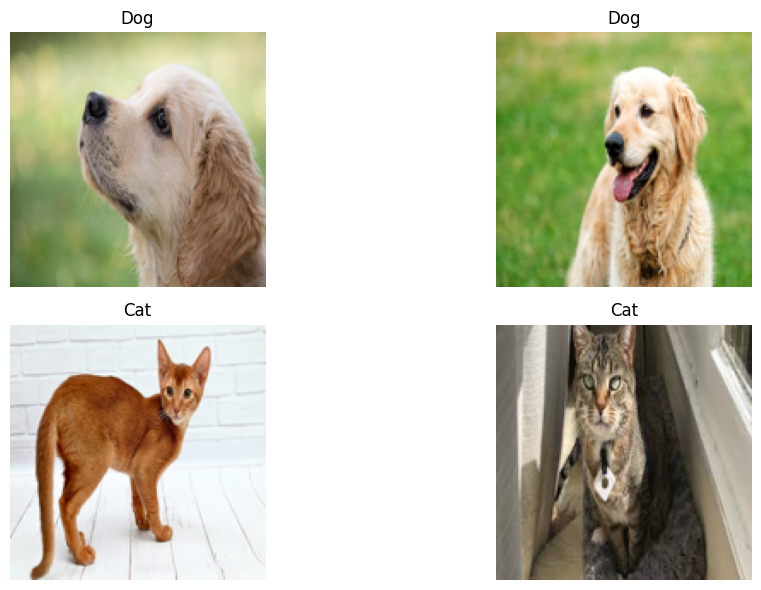

In [ ]:
import urllib.request
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from io import BytesIO
# URLs of the images to fetch
image_urls = [
"https://www.adelaide.edu.au/newsroom/sites/default/files/styles/ua_image/public/media/images/2020-07/labrador-dog-image-from-pixabay.jpg?itok=VjwGmMcR",
"https://i2-prod.irishmirror.ie/incoming/article26185096.ece/ALTERNATES/s615/0_I220209_151028_100570909oTextTRMRMMGLPICT000255932810o.jpg",
"https://petrebels.whitelabel-cdn.nl/wp-content/uploads/2022/06/sergey-semin-slJ2lG1Pego-unsplash-scaled.jpg",
"https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQDeuQK-jv70N1bzAJe8YzqcgdgraX70uioWQ&usqp=CAU",
]

# Fetch images and convert them to numpy arrays
images = []
for url in image_urls:
    with urllib.request.urlopen(url) as url_response:
        image_data = url_response.read()
        image = np.array(Image.open(BytesIO(image_data)).resize((150, 150)))
        image = np.array(image, dtype=np.float32) / 255.0
        images.append(image)
print()
# Display images with titles using matplotlib
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
for i, ax in enumerate(axs.flatten()):
    result=model.predict(np.array([images[i]]))>0.5
    ax.imshow(images[i])
    if result:
      ax.set_title("Dog")
    else:
      ax.set_title("Cat")
    ax.axis('off')
plt.tight_layout()
plt.show()
